# Tarea 2 AW: Web scraping

### Manel Soler Sanz
En esta práctica vamos a realizar distintos ejercicios sobre captura de contenidos web (web scraping) usando las librerías vistas en clase (`request`,`BeautifulSoup` y `Selenium`).

In [59]:
import requests
from bs4 import BeautifulSoup
import selenium
import re


## Parte 1: Captura de datos meteorológicos
En este parte vamos a capturar datos meteorológicos de la Comunitat Valenciana desde la página de la [AVAMET (Associació valenciana de meteorologia)](https://www.avamet.org) con request and BeautifulSoup.

In [2]:
#esta página contiene los datos meteorológicos de un día concreto
fecha = '2022-03-16'
r = requests.get("https://www.avamet.org/mx-meteoxarxa.php", params={'id':fecha})

In [3]:
soup = BeautifulSoup(r.text, "html.parser")

Los datos de todos los municipios de la CV están en una tabla de clase `tDades`

In [4]:
tabla = soup.find("table", class_="tDades")
tabla

<table class="tDades">
<thead class="fixe1">
<tr>
<th rowspan="2" width="36%">Estació</th>
<th colspan="3">Temperatura (°C)</th>
<th>HR (%)</th>
<th rowspan="2" width="9%">Prec. (mm)</th>
<th colspan="3">Vent</th>
</tr>
<tr>
<th width="8%">Mín</th>
<th width="8%">Mit</th>
<th width="8%">Màx</th>
<th width="8%">Mit</th>
<th width="8%">Mit</th>
<th width="8%">Dir</th>
<th width="8%">Màx</th>
</tr>
</thead>
<tr>
<td class="rProvincia" colspan="8">Província de Castelló</td>
</tr>
<tr>
<td class="rComarca" colspan="8">els Ports</td>
</tr>
<tr>
<td class="rEsta"><a class="negre" href="mx-fitxa.php?id=c01m038e20"><img alt="" height="13" src="imatges/2017/clas/estrela-mx-.png" title="" width="13"> Castellfort<span class="rEstaDmxo"><span class="ptda"></span>AEMET</span></img></a> </td>
<td class="rValm colornT17">5,2 </td>
<td class="rValm colornT17">5,8 </td>
<td class="rValm colornT18">6,5 </td>
<td class="rVal"> </td>
<td class="rValm colorP00">0,1 </td>
<td class="rVal"> </td>
<td class="r

Dentro de la tabla, los datos están en las filas (`<tr>`) que tienen un elemento`<td class='rEsta'>`. Definimos una función para filtrar etiquetas con esta clase y buscamos todos los elementos internos a la tabla:

In [5]:
def clase_rEsta(tag):
    return tag.find(class_="rEsta")


In [6]:
loc = tabla.find_all(clase_rEsta)

In [7]:
len(loc)

762

Nos fijamos por ejemplo en el primer elemento de esta lista:

In [8]:
print(loc[0].prettify())

<tr>
 <td class="rEsta">
  <a class="negre" href="mx-fitxa.php?id=c01m038e20">
   <img alt="" height="13" src="imatges/2017/clas/estrela-mx-.png" title="" width="13">
    Castellfort
    <span class="rEstaDmxo">
     <span class="ptda">
     </span>
     AEMET
    </span>
   </img>
  </a>
 </td>
 <td class="rValm colornT17">
  5,2
 </td>
 <td class="rValm colornT17">
  5,8
 </td>
 <td class="rValm colornT18">
  6,5
 </td>
 <td class="rVal">
 </td>
 <td class="rValm colorP00">
  0,1
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
  <b>
  </b>
 </td>
</tr>



Vemos que algunas de las celdas de esta fila tienen elementos de tipo `<span>`. Si no nos interesan los podríamos eliminar con el método `.decompose()` del Tag. Pero como el texto nos interesa insertamos un espacio para separar el contenido al extraer el texto posteriormente con `.text()`:

In [9]:
for t in loc:
    for t in t.find_all('span', class_="rEstaDmxo"):
        t.insert_before(' ')
print(loc[0].prettify())

<tr>
 <td class="rEsta">
  <a class="negre" href="mx-fitxa.php?id=c01m038e20">
   <img alt="" height="13" src="imatges/2017/clas/estrela-mx-.png" title="" width="13">
    Castellfort
    <span class="rEstaDmxo">
     <span class="ptda">
     </span>
     AEMET
    </span>
   </img>
  </a>
 </td>
 <td class="rValm colornT17">
  5,2
 </td>
 <td class="rValm colornT17">
  5,8
 </td>
 <td class="rValm colornT18">
  6,5
 </td>
 <td class="rVal">
 </td>
 <td class="rValm colorP00">
  0,1
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
  <b>
  </b>
 </td>
</tr>



In [10]:
#Cada celda <td> dentro de la fila es una columna de la tabla
[t.text.strip() for t in loc[0].find_all("td")]


['Castellfort AEMET', '5,2', '5,8', '6,5', '', '0,1', '', '', '']

In [11]:
[t for t in loc[0].find_all("td")]

[<td class="rEsta"><a class="negre" href="mx-fitxa.php?id=c01m038e20"><img alt="" height="13" src="imatges/2017/clas/estrela-mx-.png" title="" width="13"> Castellfort <span class="rEstaDmxo"><span class="ptda"></span>AEMET</span></img></a> </td>,
 <td class="rValm colornT17">5,2 </td>,
 <td class="rValm colornT17">5,8 </td>,
 <td class="rValm colornT18">6,5 </td>,
 <td class="rVal"> </td>,
 <td class="rValm colorP00">0,1 </td>,
 <td class="rVal"> </td>,
 <td class="rVal"> </td>,
 <td class="rVal"><b> </b></td>]

In [12]:
#Capturamos toda la tabla
datos = [[t.text.strip() for t in l.find_all("td")] for l in loc]


In [13]:
#Todas las filas tienen los mismos datos
len(datos[0])

9

Ahora exportamos la tabla como un DataFrame de `pandas`:

In [14]:
import pandas as pd

In [15]:
data_matrix = pd.DataFrame(datos)

In [16]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       762 non-null    object
 1   1       762 non-null    object
 2   2       762 non-null    object
 3   3       762 non-null    object
 4   4       762 non-null    object
 5   5       762 non-null    object
 6   6       762 non-null    object
 7   7       762 non-null    object
 8   8       762 non-null    object
dtypes: object(9)
memory usage: 53.7+ KB


In [17]:
#Definimos el nombre de las columnas
data_matrix.columns = ['localidad','Temp','Tmax','Tmin','Humedad','Precip',
                      'Vel.viento','Dir.viento','Vmax_viento']

In [18]:
data_matrix.head(5)

,localidad,Temp,Tmax,Tmin,Humedad,Precip,Vel.viento,Dir.viento,Vmax_viento
0,Castellfort AEMET,"5,2","5,8","6,5",,"0,1",,,
1,Cinctorres,"7,8","8,3","9,2",91,"1,0","6,4",ESE,"25,7"
2,Forcall,"9,4","10,2","11,2",88,"0,4","5,8",N,"25,7"
3,la Mata,"8,6","9,1","10,3",89,"0,2","5,6",ESE,"37,0"
4,Morella centre,"7,1","8,0","9,2",94,"0,0","5,8",ENE,"33,8"


### Ejercicio 1
Crea un script para capturar los datos de un territorio y una fecha concretas a través de la URL:\
`https://www.avamet.org/mx-meteoxarxa.php?id={fecha}&territori={territorio}`\
Los códigos de cada territorio están en el elemento `select` siguiente:

In [19]:
soup.find("select", attrs={'name':"freg_territori"})

<select class="formBasic" name="freg_territori" onchange="location.href='mx-meteoxarxa.php?id=2022-03-16&amp;territori=' + this.value">
<option selected="" style="font-weight:800;" value="pv">TOT EL TERRITORI</option>
<option style="font-weight:800;" value="p12">Prov. Castelló</option>
<option value="c01">   els Ports</option>
<option value="c02">   l′Alt Maestrat</option>
<option value="c03">   el Baix Maestrat</option>
<option value="c04">   l′Alcalatén</option>
<option value="c05">   la Plana Alta</option>
<option value="c06">   la Plana Baixa</option>
<option value="c07">   l′Alt Palància</option>
<option value="c08">   l′Alt Millars</option>
<option style="font-weight:800;" value="p46">Prov. València</option>
<option value="c09">   el Racó d′Ademús</option>
<option value="c10">   els Serrans</option>
<option value="c11">   el Camp de Túria</option>
<option value="c12">   el Camp de Morvedre</option>
<option value="c13">   l′Horta Nord</option>
<option value="c14">   l′Horta Oest</

In [20]:
# Solución
fecha = '2022-03-18'
territorio = "c24"
r = requests.get("https://www.avamet.org/mx-meteoxarxa.php", params={'id':fecha,'territori':territorio})
soup = BeautifulSoup(r.text, "html.parser")

In [21]:
tabla = soup.find("table", class_="tDades")
tabla

<table class="tDades">
<thead class="fixe1">
<tr>
<th rowspan="2" width="36%">Estació</th>
<th colspan="3">Temperatura (°C)</th>
<th>HR (%)</th>
<th rowspan="2" width="9%">Prec. (mm)</th>
<th colspan="3">Vent</th>
</tr>
<tr>
<th width="8%">Mín</th>
<th width="8%">Mit</th>
<th width="8%">Màx</th>
<th width="8%">Mit</th>
<th width="8%">Mit</th>
<th width="8%">Dir</th>
<th width="8%">Màx</th>
</tr>
</thead>
<tr>
<td class="rProvincia" colspan="8">Província de València</td>
</tr>
<tr>
<td class="rComarca" colspan="8">la Vall d′Albaida</td>
</tr>
<tr>
<td class="rEsta"><a class="negre" href="mx-fitxa.php?id=c24m003e02"><img alt="Estació associada a AVAMET" height="13" src="imatges/2017/clas/estrela-mx-soci.png" title="Estació associada a AVAMET" width="13"> Atzeneta d′Albaida<span class="rEstaDmxo"><span class="ptda"></span></span></img></a> </td>
<td class="rValm colornT19">8,2 </td>
<td class="rValm colornT19">9,1 </td>
<td class="rValm colornT20">10,3 </td>
<td class="rVal">99 </td>
<td 

In [22]:
def clase_rEsta(tag):
    return tag.find(class_="rEsta")


loc = tabla.find_all(clase_rEsta)

len(loc)

46

In [23]:
for t in loc:
    for t in t.find_all('span', class_="rEstaDmxo"):
        t.insert_before(' ')

print(loc[0].prettify())

<tr>
 <td class="rEsta">
  <a class="negre" href="mx-fitxa.php?id=c24m003e02">
   <img alt="Estació associada a AVAMET" height="13" src="imatges/2017/clas/estrela-mx-soci.png" title="Estació associada a AVAMET" width="13">
    Atzeneta d′Albaida
    <span class="rEstaDmxo">
     <span class="ptda">
     </span>
    </span>
   </img>
  </a>
 </td>
 <td class="rValm colornT19">
  8,2
 </td>
 <td class="rValm colornT19">
  9,1
 </td>
 <td class="rValm colornT20">
  10,3
 </td>
 <td class="rVal">
  99
 </td>
 <td class="rValm colorP02">
  40,4
 </td>
 <td class="rVal">
  5,3
 </td>
 <td class="rVal">
  ENE
 </td>
 <td class="rVal">
  <b>
   43,9
  </b>
 </td>
</tr>



In [24]:
#Cada celda <td> dentro de la fila es una columna de la tabla
[t.text.strip() for t in loc[0].find_all("td")]


['Atzeneta d′Albaida',
 '8,2',
 '9,1',
 '10,3',
 '99',
 '40,4',
 '5,3',
 'ENE',
 '43,9']

In [25]:
[t for t in loc[0].find_all("td")]

[<td class="rEsta"><a class="negre" href="mx-fitxa.php?id=c24m003e02"><img alt="Estació associada a AVAMET" height="13" src="imatges/2017/clas/estrela-mx-soci.png" title="Estació associada a AVAMET" width="13"> Atzeneta d′Albaida <span class="rEstaDmxo"><span class="ptda"></span></span></img></a> </td>,
 <td class="rValm colornT19">8,2 </td>,
 <td class="rValm colornT19">9,1 </td>,
 <td class="rValm colornT20">10,3 </td>,
 <td class="rVal">99 </td>,
 <td class="rValm colorP02">40,4 </td>,
 <td class="rVal">5,3 </td>,
 <td class="rVal">ENE </td>,
 <td class="rVal"><b>43,9 </b></td>]

In [26]:
#Capturamos toda la tabla
datos = [[t.text.strip() for t in l.find_all("td")] for l in loc]
#Todas las filas tienen los mismos datos
len(datos[0])

9

In [27]:
data_matrix = pd.DataFrame(datos)
#Definimos el nombre de las columnas
data_matrix.columns = ['localidad','Temp','Tmax','Tmin','Humedad','Precip',
                      'Vel.viento','Dir.viento','Vmax_viento']

In [28]:
data_matrix.head(12)

,localidad,Temp,Tmax,Tmin,Humedad,Precip,Vel.viento,Dir.viento,Vmax_viento
0,Atzeneta d′Albaida,"8,2","9,1","10,3",99,"40,4","5,3",ENE,"43,9"
1,Agullent,"8,0","9,1","9,8",100,"60,2","13,2",NE,"37,0"
2,Albaida IES J. Segrelles,"8,6","9,7","10,5",99,"38,0","6,9",ENE,"40,2"
3,Alfarrasí Ajuntament,"9,7","11,2","13,2",94,"29,8","10,3",NE,"35,4"
4,Alfarrasí CEIP Doctor Borrás,"10,1","11,4","13,6",91,"31,6","9,8",NNE,"33,8"
5,Aielo de Malferit centre,"9,1","10,5","12,6",97,"30,0","9,0",N,"34,9"
6,Aielo de Rugat el Planet,"10,2","11,2","12,4",,"24,8","11,1",NE,"43,5"
7,Bèlgida Mandola,"9,4","10,7","12,7",98,"34,3","5,8",NE,"24,0"
8,Bèlgida Ajuntament,"9,1","9,9","11,1",99,"39,2","7,7",NE,"37,0"
9,Beniatjar,"8,8","9,9","11,3",97,"37,5","8,1",ENE,"39,0"


### Ejercicio 2:
Captura los datos durante un mes de la estación de 'València Camins al Grau' y representa gráficamente su temperatura media 

In [29]:
# Solución
fecha = '2022-02-01'
territorio = "c15m250e08" # partimos del codgi ode la estacion 
r = requests.get("https://www.avamet.org/mx-mes.php", params={'id':territorio,'data':fecha}) # tambien hemos cambiado la pagina url
soup = BeautifulSoup(r.text, "html.parser")

In [30]:
tabla = soup.find("table", class_="tDades")
def clase_rEsta(tag):
    return tag.find(class_="rVal")


loc = tabla.find_all(clase_rEsta)

len(loc)


32

In [31]:
for t in loc:
    for t in t.find_all('span', class_="rEstaDmxo"):  # la función para filtrar etiquetas con esta nueva clase y buscamos todos los elementos internos a la tabla:
        t.insert_before(' ')

In [32]:
[t.text.strip() for t in loc[4].find_all("td")]

['01',
 '10,1',
 '14,0',
 '18,2',
 '39',
 '52',
 '79',
 '1.025,0',
 '1.027,0',
 '1.030,0',
 'WNW',
 '5,6',
 '53,3',
 '0,0',
 '',
 '']

In [33]:
[t for t in loc[0].find_all("td")]

[<td class="tDadesh3" colspan="14">Detall diari</td>]

In [34]:
#Capturamos toda la tabla
datos = [[t.text.strip() for t in l.find_all("td")] for l in loc]


In [35]:
# vemos que los primeros datos no son datos de nuestro interés. Lo hemos comprovd en la pagina web
for i in range (0,10):
    print(len(datos[i]))
    


1
0
0
448
16
16
16
16
16
16


In [36]:
#Todas las filas tienen los mismos datos meos las primeras 4 . La quitamos
data_matrix = pd.DataFrame(datos[4:len(datos)])
#Definimos el nombre de las columnas
data_matrix.columns = ['Dia', 'Temp_min', 'Temp_med', 'Temp_Max', 'Hum_min','Hum_med','Hum_max',
                      'Pres_min','Pres_med','Pres_max', 'Vent_pred','Vent_mit','Raf_max', 'prec','n','PQ']

In [37]:
data_matrix.head(12)

,Dia,Temp_min,Temp_med,Temp_Max,Hum_min,Hum_med,Hum_max,Pres_min,Pres_med,Pres_max,Vent_pred,Vent_mit,Raf_max,prec,n,PQ
0,01,"10,1","14,0","18,2",39,52,79,"1.025,0","1.027,0","1.030,0",WNW,"5,6","53,3","0,0",,
1,02,"9,9","14,2","22,3",40,65,88,"1.024,0","1.026,9","1.030,0",WSW,"3,7","16,6","0,0",,
2,03,"10,2","13,5","19,3",45,70,93,"1.020,0","1.022,8","1.026,0",NW,"3,4","20,1","0,0",,
3,04,"10,4","13,1","16,5",70,84,91,"1.021,0","1.022,8","1.025,0",N,"2,5","25,6","0,0",,
4,05,"12,6","13,7","16,4",65,80,90,"1.024,0","1.026,9","1.030,0",NE,"1,6","13,0","0,0",,
5,06,"10,7","12,9","15,9",59,77,84,"1.029,0","1.030,3","1.032,0",ENE,"2,9","23,8","0,0",,
6,07,"8,4","13,4","16,7",43,72,87,"1.028,0","1.029,6","1.032,0",NW,"3,6","20,1","0,0",,
7,08,"8,2","11,6","16,2",50,72,87,"1.032,0","1.034,0","1.036,0",N,"2,5","14,8","0,0",,
8,09,"11,2","12,6","15,0",64,78,86,"1.033,0","1.034,0","1.036,0",NNE,"3,1","20,1","0,0",,
9,10,"8,9","12,2","16,4",54,74,83,"1.028,0","1.030,6","1.033,0",NW,"3,8","18,3","0,0",,


In [38]:
for i in range(0,len(data_matrix["Temp_med"])):
    data_matrix["Temp_med"][i] =  float(data_matrix["Temp_med"][i].replace(',','.'))


<AxesSubplot:xlabel='Dia'>

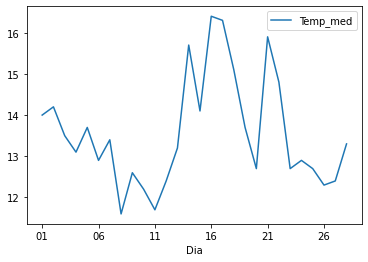

In [39]:
data_matrix.plot(x="Dia", y="Temp_med")

## Parte 2: Datos de la Wikipedia
En esta parte vamos a obtener las URL de las entradas en la wikipedia para todas las provincias de España y vamos a obtener de ellas sus datos básicos en forma de tabla.\
El listado de las provincias de España se puede descargar de la página de la wikipedia siguiente:\
https://es.wikipedia.org/wiki/Provincia_(España) Este ejercicio también se realizará con request y BeautifulSoup.

In [40]:
r = requests.get("https://es.wikipedia.org/wiki/Provincia_(España)")
soup = BeautifulSoup(r.text, "html.parser")

In [41]:
tabla = soup.find("table", class_="wikitable")

In [42]:
tabla

<table border="1" class="wikitable sortable">
<tbody><tr>
<th>Provincia
</th>
<th>Nombre oficial
</th>
<th>Capital
</th>
<th>Comunidad autónoma
</th>
<th class="unsortable">Municipios
</th></tr>
<tr>
<td><a href="/wiki/%C3%81lava" title="Álava">Álava</a>
</td>
<td><i>Araba/Álava</i>
</td>
<td><a href="/wiki/Vitoria" title="Vitoria">Vitoria</a>
</td>
<td><a href="/wiki/Pa%C3%ADs_Vasco" title="País Vasco">País Vasco</a>
</td>
<td><a href="/wiki/Anexo:Municipios_de_%C3%81lava" title="Anexo:Municipios de Álava">Municipios de la provincia de Álava</a>
</td></tr>
<tr>
<td><a href="/wiki/Provincia_de_Albacete" title="Provincia de Albacete">Albacete</a>
</td>
<td><i>Albacete</i>
</td>
<td><a href="/wiki/Albacete" title="Albacete">Albacete</a>
</td>
<td><a href="/wiki/Castilla-La_Mancha" title="Castilla-La Mancha">Castilla-La Mancha</a>
</td>
<td><a href="/wiki/Anexo:Municipios_de_la_provincia_de_Albacete" title="Anexo:Municipios de la provincia de Albacete">Municipios de la provincia de Albace

In [43]:
#todas las columnas de la tabla
provincias = tabla.find_all("tr")

In [44]:
provincias[1].td.find_all("a")

[<a href="/wiki/%C3%81lava" title="Álava">Álava</a>]

In [45]:
enlaces = []
for p in provincias:
    if p.td:
        refs = p.td.find_all('a')
        for r in refs:
            if r.has_attr('title'):
                enlaces.append(r)

In [46]:
enlaces

[<a href="/wiki/%C3%81lava" title="Álava">Álava</a>,
 <a href="/wiki/Provincia_de_Albacete" title="Provincia de Albacete">Albacete</a>,
 <a href="/wiki/Provincia_de_Alicante" title="Provincia de Alicante">Alicante</a>,
 <a href="/wiki/Provincia_de_Almer%C3%ADa" title="Provincia de Almería">Almería</a>,
 <a class="mw-redirect" href="/wiki/Provincia_de_Asturias" title="Provincia de Asturias">Asturias</a>,
 <a href="/wiki/Provincia_de_%C3%81vila" title="Provincia de Ávila">Ávila</a>,
 <a href="/wiki/Provincia_de_Badajoz" title="Provincia de Badajoz">Badajoz</a>,
 <a href="/wiki/Provincia_de_Barcelona" title="Provincia de Barcelona">Barcelona</a>,
 <a href="/wiki/Provincia_de_Burgos" title="Provincia de Burgos">Burgos</a>,
 <a href="/wiki/Provincia_de_C%C3%A1ceres" title="Provincia de Cáceres">Cáceres</a>,
 <a href="/wiki/Provincia_de_C%C3%A1diz" title="Provincia de Cádiz">Cádiz</a>,
 <a class="mw-redirect" href="/wiki/Provincia_de_Cantabria" title="Provincia de Cantabria">Cantabria</a>,
 

In [47]:

enlaces_df = pd.DataFrame({'provincia': [e.attrs['title'] for e in enlaces],
                           'enlace': [e.attrs['href'] for e in enlaces]})

In [48]:
enlaces_df

,provincia,enlace
0,Álava,/wiki/%C3%81lava
1,Provincia de Albacete,/wiki/Provincia_de_Albacete
2,Provincia de Alicante,/wiki/Provincia_de_Alicante
3,Provincia de Almería,/wiki/Provincia_de_Almer%C3%ADa
4,Provincia de Asturias,/wiki/Provincia_de_Asturias
5,Provincia de Ávila,/wiki/Provincia_de_%C3%81vila
6,Provincia de Badajoz,/wiki/Provincia_de_Badajoz
7,Provincia de Barcelona,/wiki/Provincia_de_Barcelona
8,Provincia de Burgos,/wiki/Provincia_de_Burgos
9,Provincia de Cáceres,/wiki/Provincia_de_C%C3%A1ceres


Por ejemplo, creamos la sopa para la primera provincia:

In [49]:
r = requests.get("https://es.wikipedia.org"+enlaces_df['enlace'][0])
soup = BeautifulSoup(r.text, "html.parser")

Vamos a extraer en un data frame la información geográfica de la tabla de la barra lateral derecha (atributo de clase `infobox`):

In [50]:
tabla = soup.find("table", class_="infobox")

Si inspeccionas su estructura HTML verás una serie de tags `tr` de las que cuelgan pares de tags `th` y `td` asociadas. Capturaremos sus textos en dos listas: `dato` y `valor`, respectivamante.

In [51]:
dato, valor = [],[]
for t in tabla.find_all("tr"):
    if t.th:
        if t.td:
            dato.append(t.th.text)
            valor.append(' '.join([text for text in t.td.stripped_strings]))

In [52]:
datos = pd.DataFrame({'Dato': dato, 'Valor': valor})
datos

,Dato,Valor
0,Coordenadas,"42°50′00″N 2°45′00″O ﻿ / ﻿ 42.833333333333, -2.75"
1,Capital,Vitoria
2,Idioma oficial,Español y euskera
3,Entidad,Provincia de España
4,• País,España
5,• Comunidad,País Vasco
6,CongresoSenadoParlamento VascoJuntas Generales...,4 diputados 4 senadores 25 parlamentarios 51 p...
7,Subdivisiones,7 comarcas 51 municipios
8,Fundación,División territorial de 1833
9,Superficie,Puesto 48.º


### Ejercicio 3
Crea una tabla (dataframe) con la capital, la superficie y la población de cada provincia de España.\
Para encontrar en la tabla estos datos podemos hacer:

In [53]:
tabla.find(string='Capital').next.text

'\nVitoria'

In [54]:
tabla.find(string='Superficie').parent.parent.parent.next_sibling.text

'\xa0• Total\n3037 km²\xa0(0,60\xa0%)'

In [55]:
tabla.find(string='Población').parent.parent.parent.next_sibling.text

'\xa0• Total\n333,340\xa0hab.\xa0(0,69\xa0%)'

Tendrás que usar expresiones regulares para extraer de estos strings el texto buscado.

In [56]:
#solución
    
len(enlaces)
tablas = []
for i in range(len(enlaces)):
    r = requests.get("https://es.wikipedia.org"+enlaces_df['enlace'][i])
    soup = BeautifulSoup(r.text, "html.parser")
    tablas.append(soup.find("table", class_="infobox"))

In [57]:
capitales = []
superficies = []
poblaciones = []
for i in range (len(tablas)):
    if tablas[i].find(string='Población'):
        capitales.append(tablas[i].find(string='Capital').next.text)
        superficies.append(tablas[i].find(string='Superficie').parent.parent.parent.next_sibling.text)
        poblaciones.append(tablas[i].find(string='Población').parent.parent.parent.next_sibling.text)


## Limpiamos las expresiones

In [60]:
just_capitales=[re.findall(r'[A-Z_ÁÉÍÓÚ].+[a-z]', i) for i in capitales]

In [145]:
# vemos que con estos comandos conseguimos limpiar los datos : 
superficies[8].replace("\xa0","").replace("Total","").replace("\n","").replace("&","") 


'• 014292.014292 km²(2,77% de España)'

In [142]:
just_superficies = []
just_poblaciones = []

# guardamos los valores limpiados 
for i in range(len(superficies)):
    just_superficies.append(re.sub(r'&+[0-9]+.&+',"",superficies[i].replace("\xa0","").replace("Total","").replace("\n","").replace(r'[&]*',"")))
    just_poblaciones.append(re.sub(r'&+[0-9]+.&+',"",poblaciones[i].replace("\xa0","").replace("Total","").replace("\n","")))

In [143]:
# creamos un data frame con los datos ya limpios
datos2 = pd.DataFrame({'Capital': just_capitales, 'Superficie(km^2)': just_superficies, 'Poblacion': just_poblaciones})
datos2

,Capital,Superficie(km^2),Poblacion
0,[Vitoria],"• 3037 km²(0,60%)","• 333,340hab.(0,69%)"
1,[Albacete],"• 14926 km²(0,84%)","• 388270hab.(0,81%)"
2,[Alicante],"• 5816 km²(1,16%)","• 1,879,888hab.(3,96%)"
3,[Almería],"• 8774 km²(1,73%)","• 706672hab.(1,52%)"
4,[Oviedo],"• 10603,57 km²(2,1%)","• 01011792[1]​hab.(2,15%)"
5,[Ávila],"• 8050.15 km²(1,60% de España)","• 160700hab.(0,37% de España)"
6,[Badajoz],"• 21766 km²(4,30%)","• 669,733hab.(1,47%)"
7,[Barcelona],"• 7726[1]​ km²(1,53%)","• 5743402[2]​hab.(12,05%)"
8,[Burgos],"• 014292 km²(2,77% de España)","• 358171hab.(0,78% de España)"
9,[Cáceres],"• 19868 km²(3,94%)","• 392,931hab.(0,88%)"


## Parte 3: Datos de las mejores películas por géneros

### Ejercicio 4

Basándote en el notebook `T3_WebScraping2`, Crea un dataframe con las 100 mejores películas de 5 géneros diferentes. https://www.rottentomatoes.com/top/bestofrt/top_100_action__adventure_movies/.
Guarda en una lista el año en el que salieron las mejores películas de cada uno de los 5 géneros. Para ello utiliza RegEx y la librería re.

In [147]:
#solución
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By 

#browser exposes an executable file
#Through Selenium test we will invoke the executable file which will then #invoke actual browser
driver = webdriver.Firefox()
driver.get('https://www.rottentomatoes.com/top/bestofrt/top_100_action__adventure_movies/')


In [148]:
peliculas = driver.find_elements(By.XPATH,'//a[@class="unstyled articleLink"]')

In [149]:
lista_peliculas_adv = []
for p in range(len(peliculas)):
    if peliculas[p].text:
        lista_peliculas_adv.append(peliculas[p].text)

In [150]:
## para drama

# para cada una vamos a definir el link correspondiente
driver.get('https://www.rottentomatoes.com/top/bestofrt/top_100_drama_movies/')
peliculas = driver.find_elements(By.XPATH,'//a[@class="unstyled articleLink"]')
lista_peliculas_drama = []
for p in range(len(peliculas)):
    if peliculas[p].text:
        lista_peliculas_drama.append(peliculas[p].text)

In [151]:
## horror

driver.get('https://www.rottentomatoes.com/top/bestofrt/top_100_horror_movies/')
peliculas = driver.find_elements(By.XPATH,'//a[@class="unstyled articleLink"]')
lista_peliculas_horror = []
for p in range(len(peliculas)):
    if peliculas[p].text:
        lista_peliculas_horror.append(peliculas[p].text)

In [152]:
## romance

driver.get('https://www.rottentomatoes.com/top/bestofrt/top_100_romance_movies/')
peliculas = driver.find_elements(By.XPATH,'//a[@class="unstyled articleLink"]')
lista_peliculas_romance = []
for p in range(len(peliculas)):
    if peliculas[p].text:
        lista_peliculas_romance.append(peliculas[p].text)

In [153]:
## comedia

driver.get('https://www.rottentomatoes.com/top/bestofrt/top_100_comedy_movies/')
peliculas = driver.find_elements(By.XPATH,'//a[@class="unstyled articleLink"]')
lista_peliculas_comedy = []
for p in range(len(peliculas)):
    if peliculas[p].text:
        lista_peliculas_comedy.append(peliculas[p].text)

In [154]:
peliculas_genero = pd.DataFrame({'Aventuras': lista_peliculas_adv, 'Drama': lista_peliculas_drama, 'Horror': lista_peliculas_horror, 'Romance' : lista_peliculas_romance, 'Comedia' : lista_peliculas_comedy})
peliculas_genero.head(50)

,Aventuras,Drama,Horror,Romance,Comedia
0,Black Panther (2018),Citizen Kane (1941),Us (2019),It Happened One Night (1934),It Happened One Night (1934)
1,Avengers: Endgame (2019),Black Panther (2018),Get Out (2017),Casablanca (1942),Modern Times (1936)
2,Mission: Impossible - Fallout (2018),Parasite (Gisaengchung) (2019),The Cabinet of Dr. Caligari (Das Cabinet des D...,The Philadelphia Story (1940),Toy Story 4 (2019)
3,Mad Max: Fury Road (2015),Avengers: Endgame (2019),A Quiet Place (2018),A Night at the Opera (1935),Lady Bird (2017)
4,Spider-Man: Into the Spider-Verse (2018),Casablanca (1942),The Invisible Man (2020),The Shape of Water (2017),BlacKkKlansman (2018)
5,Wonder Woman (2017),Knives Out (2019),"Nosferatu, a Symphony of Horror (Nosferatu, ei...",Singin' in the Rain (1952),The Philadelphia Story (1940)
6,Logan (2017),Lady Bird (2017),King Kong (1933),The Big Sick (2017),Eighth Grade (2018)
7,Coco (2017),Mission: Impossible - Fallout (2018),Psycho (1960),On the Waterfront (1954),Booksmart (2019)
8,Dunkirk (2017),BlacKkKlansman (2018),The Bride of Frankenstein (1935),An American in Paris (1951),His Girl Friday (1940)
9,Star Wars: The Last Jedi (2017),The Irishman (2019),The Babadook (2014),The Best Years of Our Lives (1946),Coco (2017)


Pasamos a guardas las listas de los años y lo representaremos en un nuevo data frame, con los titulos y los años

In [155]:

years_adv,years_drama , years_horror, years_romance, years_comedia = [], [], [], [], []


for i in range(len(peliculas_genero)):
    years_adv.append(re.findall(r'[0-9]{4}', lista_peliculas_adv[i]))
    years_drama.append(re.findall(r'[0-9]{4}', lista_peliculas_drama[i]))
    years_horror.append(re.findall(r'[0-9]{4}', lista_peliculas_horror[i]))
    years_romance.append(re.findall(r'[0-9]{4}', lista_peliculas_romance[i]))
    years_comedia.append(re.findall(r'[0-9]{4}', lista_peliculas_comedy[i]))


In [156]:
peliculas_genero_año = pd.DataFrame({'Aventuras': lista_peliculas_adv,'Año aventuras': years_adv ,'Drama': lista_peliculas_drama, 'Año drama' : years_drama ,
                                 'Horror': lista_peliculas_horror,'Año horror' : years_horror ,  'Romance' : lista_peliculas_romance, 'Año Romance': years_romance,
                                 'Comedia' : lista_peliculas_comedy, 'Año comedia' : years_comedia})
peliculas_genero_año.head(50)

,Aventuras,Año aventuras,Drama,Año drama,Horror,Año horror,Romance,Año Romance,Comedia,Año comedia
0,Black Panther (2018),[2018],Citizen Kane (1941),[1941],Us (2019),[2019],It Happened One Night (1934),[1934],It Happened One Night (1934),[1934]
1,Avengers: Endgame (2019),[2019],Black Panther (2018),[2018],Get Out (2017),[2017],Casablanca (1942),[1942],Modern Times (1936),[1936]
2,Mission: Impossible - Fallout (2018),[2018],Parasite (Gisaengchung) (2019),[2019],The Cabinet of Dr. Caligari (Das Cabinet des D...,[1920],The Philadelphia Story (1940),[1940],Toy Story 4 (2019),[2019]
3,Mad Max: Fury Road (2015),[2015],Avengers: Endgame (2019),[2019],A Quiet Place (2018),[2018],A Night at the Opera (1935),[1935],Lady Bird (2017),[2017]
4,Spider-Man: Into the Spider-Verse (2018),[2018],Casablanca (1942),[1942],The Invisible Man (2020),[2020],The Shape of Water (2017),[2017],BlacKkKlansman (2018),[2018]
5,Wonder Woman (2017),[2017],Knives Out (2019),[2019],"Nosferatu, a Symphony of Horror (Nosferatu, ei...",[1922],Singin' in the Rain (1952),[1952],The Philadelphia Story (1940),[1940]
6,Logan (2017),[2017],Lady Bird (2017),[2017],King Kong (1933),[1933],The Big Sick (2017),[2017],Eighth Grade (2018),[2018]
7,Coco (2017),[2017],Mission: Impossible - Fallout (2018),[2018],Psycho (1960),[1960],On the Waterfront (1954),[1954],Booksmart (2019),[2019]
8,Dunkirk (2017),[2017],BlacKkKlansman (2018),[2018],The Bride of Frankenstein (1935),[1935],An American in Paris (1951),[1951],His Girl Friday (1940),[1940]
9,Star Wars: The Last Jedi (2017),[2017],The Irishman (2019),[2019],The Babadook (2014),[2014],The Best Years of Our Lives (1946),[1946],Coco (2017),[2017]


In [159]:
# Para la representación no es necesario, pero si quisieramos , podríamos pasar los valores de los años a valores númericos 

for i in range (10):
    print(int(years_adv[i][0]))

2018
2019
2018
2015
2018
2017
2017
2017
2017
2017
